# EDSA Movie Recommendation Challenge

© Explore Data Science Academy

---
### Honour Code
#### Team EG2 Members

I {**Hendrietta Setsome, Edidiong Udofia, Boitemogelo Tagane, Tonia Omonayin, Winnie Mmari, Pricilla Vhafuniwa Ndou**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## Table Of Contents

<a href=#one>1. Introduction </a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feature Engineering</a>

<a href=#seven>6. Modeling</a>

<a href=#eight>7. Model Performance</a>

<a href=#nine>8. Model Explanation</a>

<a href=#ten>9. Conclusion</a>

<a href=#ten>10. Resources</a>

In [1]:
# We will be using Comet as a form of version control throughout the development of our model
from comet_ml import Experiment

In [28]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="KQ1UTh7hBvPLWlz3034oIgusG",
    project_name="edsa-movie-recommendation-challenge",
    workspace="thobekanimasondo84-gmail-com",)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\ctair\\Unsupervised Learning' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.

COMET INFO: Experiment is live on comet.com https://www.comet.com/thobekanimasondo84-gmail-com/edsa-movie-recommendation-challenge/8732212a094349308d378cff1160ca06




<a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

In our technology-driven society, recommender systems play a crucial role in both social and economic aspects, ensuring that individuals can make well-informed choices regarding the content they consume daily. A notable application of this is in movie recommendations, where advanced algorithms assist viewers in discovering outstanding titles from a vast array of options.

As EDSA students, we have developed a recommendation algorithm utilizing either content or collaborative filtering. This algorithm has the capability to predict how a user will rate a movie they haven't seen yet, drawing insights from their past preferences.

Successfully addressing this challenge holds significant economic potential. Users of the system stand to benefit by being directed to content aligned with their preferences, leading to increased revenue and fostering platform loyalty.

The evaluation metric for our model is Root Mean Square Error (RMSE), a commonly used measure in regression analysis and forecasting. RMSE assesses the standard deviation of the residuals between predicted and actual observed values in a modeling process, providing a quantitative assessment of the accuracy and reliability of our recommendation algorithms for generating user movie ratings.
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://manofmany.com/wp-content/uploads/2020/04/Veboli-new-2.jpg"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

## Problem statement

To construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error  is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. For our task of generating user movie ratings via recommendation algorithms, the the formula is given by:

$$RMSE = \sqrt{\frac{1}{|\hat{R}|} \sum_{\hat{r}_{ui}\in \hat{R}}{(r_{ui}-\hat{r}_{ui})^2}}$$

Where $$\hat{R}$$ is the total number of recommendations generated for users and movies, with rui and $$\hat{rui}$$ being the true and predicted ratings for user u watching movie i respectively.

<a id="two"></a>
## 2. Importing Packages
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [1]:
conda install -c conda-forge scikit-surprise

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - rapidsai
 - nvidia
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.1.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    joblib-1.3.2               |     pyhd8ed1ab_0         216 KB  conda-forge
    openssl-3.2.1              |       hd590300_0         2.7 MB  conda-forge
    scikit-surprise-1.1.3      |  py310h1f7b6fc_2         554 KB  conda-forge
    scipy-1.12.0          

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
import re
import plotly.express as px

import geopandas as gpd
import cufflinks as cf
import difflib
import gc   # To free up memory

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.colors import ListedColormap
from matplotlib import offsetbox
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import surprise    # Run "!pip install surprise" on new cell to download
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import accuracy
import plotly.express as px
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

from time import time    # Import time to measure algorithm runtime

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import mean_squared_error

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists
 
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

### Data Description
The dataset comprises millions of 5-star ratings collected from users of the MovieLens online movie recommendation service. Industry and academic researchers have extensively utilized the MovieLens dataset over time to enhance the effectiveness of recommender systems based on explicit user feedback.

**Source:**

The MovieLens dataset is curated by the GroupLens research group within the Department of Computer Science and Engineering at the University of Minnesota. Furthermore, supplementary information on movie content was gathered legally from IMDB through web scraping.
**Supplied Files:**
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

**Additional Information:**

The below information is provided directly from the MovieLens dataset description files:

* All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

* Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

* Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

* All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
userId,movieId,tag,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

* Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:
movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

* Genres are a pipe-separated list, and are selected from the following:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)
Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

* movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

* imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

* tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

* As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

* The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:

* The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:
tagId,tag

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# import dataset
train_df = pd.read_csv("/kaggle/input/predict-data/train.csv")
test_df = pd.read_csv("/kaggle/input/predict-data/test.csv")
tags_df = pd.read_csv("/kaggle/input/predict-data/tags.csv")
movies_df = pd.read_csv("/kaggle/input/predict-data/movies.csv")
links_df = pd.read_csv("/kaggle/input/predict-data/links.csv")
imdb_df = pd.read_csv("/kaggle/input/predict-data/imdb_data.csv")
genome_tags = pd.read_csv("/kaggle/input/predict-data/genome_tags.csv")
genome_score = pd.read_csv("/kaggle/input/predict-data/genome_scores.csv")
sample_submission = pd.read_csv("/kaggle/input/predict-data/sample_submission.csv")

#### Viewing the first 5 rows of each dataframe

In [3]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [6]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [10]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [11]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [12]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [13]:
#Checking for missing values in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [15]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [16]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [17]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [18]:
genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [19]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [20]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis (EDA) is a fundamental part of the Machine Learning process. The data is analysed in order to extract information that a model may overlook. In this section, we will summarise the main characteritics of the data and also look into the sentiment classes provided in our training datasets.

#### Using a For Loop to check the shape of each dataframe.

In [21]:
list_of_all_dataframes = [ train_df, test_df, tags_df, movies_df, links_df, imdb_df, genome_tags, genome_score]

for each in list_of_all_dataframes:
    print(each.shape)
# https://stackoverflow.com/questions/68158905/using-for-loop-to-print-shape-of-multiple-dataframes

(10000038, 4)

(5000019, 2)

(1093360, 4)

(62423, 3)

(62423, 3)

(27278, 6)

(1128, 2)

(15584448, 3)


From above, it can be seen that:
- train has ~10M rows, and 4 columns
- test has ~5M rows, and 2 columns
- tags has ~1.1M rows, and 4 columns
- movies has ~63 500 rows, and 3 columns
- links has ~62 300 rows, and 3 columns
- imdb has ~27 300 rows, and 6 columns
- genome_tags has ~1100 rows, and 2 columns
- genome_scores has ~15.6M rows, and 3 columns

#### Let's look at a distribution of the ratings given by users. Here we see that viewers generally are on the kinder end of the rating spectrum, with a far higher proportion of positive reviews (> 3) being given over negative ones (< 3).

Average rating in dataset: 3.5333951730983424


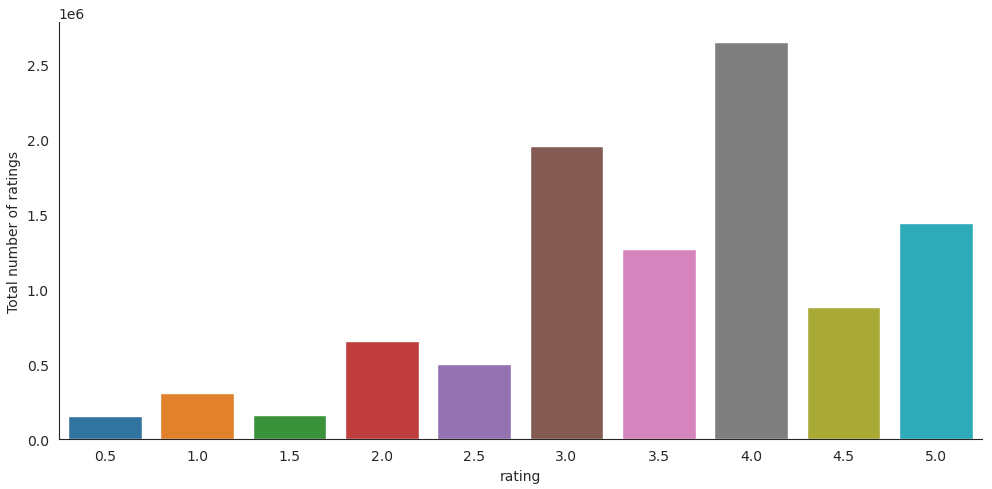

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="rating", data= train_df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print(f'Average rating in dataset: {np.mean(train_df["rating"])}')

#### Let's see the vote average

In [23]:
average_rating = round(train_df.rating.mean(),2)  # To 2 decimal places
average_rating

3.53

From the more than 10M ratings that we have, the average rating in 3.53.

Now, let's for null values present in each column of each dataframe:

In [24]:
train_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [25]:
test_df.isnull().sum()

userId     0
movieId    0
dtype: int64

In [26]:
tags_df.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [27]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [28]:
links_df.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [29]:
imdb_df.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [30]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [31]:
genome_score.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

From checking for the number of null values available in each dataframe, it is observed that the imdb dataframe has a high number of null values within the data set. We will decide on what to do to these null values later in the data engineering section.

#### Let's visualize the missing values columns in the dataframe (imdb_df) that had a significant amount of missing values

In [32]:
!pip install missingno

Text(0.5, 1.0, 'MISSING VALUES IN EACH COLUMN')

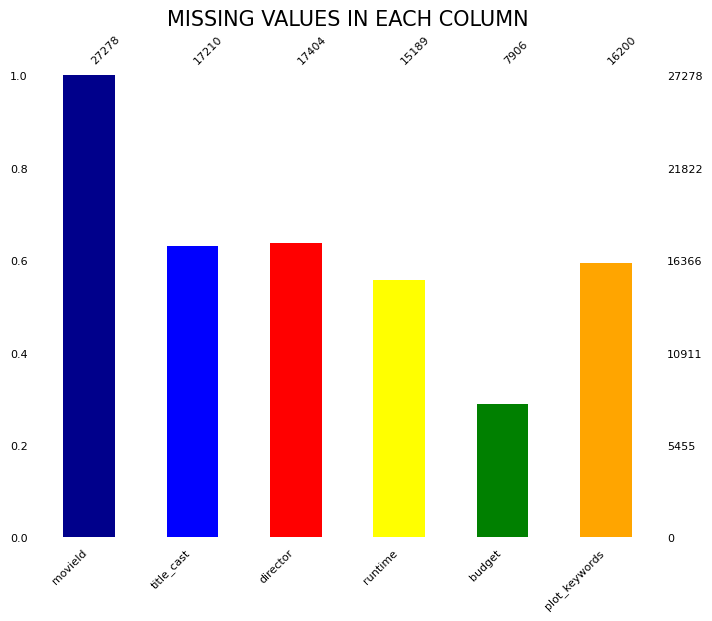

In [33]:
import missingno 
#Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['darkblue','blue','red','yellow','green','orange']
missingno.bar(imdb_df,fontsize=8,color=color,figsize=(8,6))
plt.title('MISSING VALUES IN EACH COLUMN',fontsize=15)

From the imdb_df plot above, we observed that the budget column has the highest number of missing values, with 71% of the column's data being null. Other columns such as the title_cast, director, runtime, and plot_keywords also have missing values.
- We have to find a way to deal with it.

In [34]:
df_budget = imdb_df.sort_values(by='budget',ascending=False)
print(df_budget.budget)

14584    ZAR10,000,000

23579     VEB4,273,248

24115        UAH10,000

24673    TWD50,000,000

15111    TWD45,000,000

             ...      

27271              NaN

27273              NaN

27275              NaN

27276              NaN

27277              NaN

Name: budget, Length: 27278, dtype: object


Looking at the output above, it can be seen that the values in the budget column are not stored in the same currency.

In [35]:
movies_ =imdb_df.sort_values(by='budget',ascending=False)
print(movies_.budget.str[0:3].unique())

['ZAR' 'VEB' 'UAH' 'TWD' 'TRL' 'THB' 'SIT' 'SGD' 'SEK' 'RUR' 'PTE' 'PLN'

 'PHP' 'NZD' 'NOK' 'NLG' 'NGN' 'MYR' 'MXN' 'LVL' 'LTL' 'KRW' 'JPY' 'ITL'

 'ISK' 'IRR' 'INR' 'ILS' 'IDR' 'HUF' 'HKD' 'GBP' 'FRF' 'FIM' 'EUR' 'ESP'

 'EGP' 'DKK' 'DEM' 'CZK' 'COP' 'CNY' 'CLP' 'CHF' 'CAD' 'BRL' 'BND' 'BGL'

 'BEF' 'AUD' 'ATS' 'ARS' '$99' '$98' '$95' '$94' '$93' '$92' '$90' '$9,'

 '$89' '$88' '$87' '$86' '$85' '$84' '$83' '$82' '$81' '$80' '$8,' '$79'

 '$78' '$76' '$75' '$74' '$73' '$72' '$71' '$70' '$7,' '$69' '$68' '$67'

 '$66' '$65' '$64' '$63' '$62' '$61' '$60' '$6,' '$6' '$59' '$58' '$57'

 '$56' '$55' '$54' '$53' '$52' '$51' '$50' '$5,' '$5' '$49' '$48' '$47'

 '$46' '$45' '$44' '$43' '$42' '$41' '$40' '$4,' '$4' '$39' '$38' '$37'

 '$36' '$35' '$34' '$33' '$32' '$31' '$30' '$3,' '$29' '$28' '$27' '$26'

 '$25' '$24' '$23' '$22' '$21' '$20' '$2,' '$19' '$18' '$17' '$16' '$15'

 '$14' '$13' '$12' '$11' '$10' '$1,' '$0' nan]


It can be seen that the `budget` column has different units, namely:
- ZAR
- $
- VEB
- UAH
- TWD
- TRL
- THB 
- SIT 
- SGD 
- SEK
- RUR 
- PTE
- PLN
- PHP
- NZD
- NOK
- NLG
- NGN
- MYR
- MXN
- LVL
- LTL
- KRW
- JPY
- ITL
- ISK
- IRR
- INR
- ILS
- IDR
- HUF'
- HKD
- GBP
- FRF
- FIM
- EUR
- ESP
- EGP
- DKK
- DEM
- CZK
- COP
- CNY
- CLP
- CHF
- CAD
- BRL
- BND
- BGL
- BEF
- AUD
- ATS
- ARS
- as well as null values

It is also worthy of note that this budget column might be dropped and not used for our collaboration system since the column contains more than 71% missing values. Imputing these values with the mean or the mode would create a more biased assumption of the budget column, and would not be a good representation of the column.

#### Now, visualizing the most popular Genres:

In [36]:
# Create dataframe containing only the movieId and genres
movies_genres_split = pd.DataFrame(movies_df[['movieId', 'genres']],columns=['movieId', 'genres'])

# Splitting the genres seperated by "|". Movie-genre combinations are stored as a list
movies_genres_split.genres = movies_genres_split.genres.apply(lambda x: x.split('|'))

# Creating the expanded dataframe where each movie-genre combination is in a seperate row
movies_genres_split = pd.DataFrame([(x.movieId, d) for x in movies_genres_split.itertuples() for d in x.genres],
                             columns=['movieId', 'genres'])

In [37]:
movies_genres_split.head(10)

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


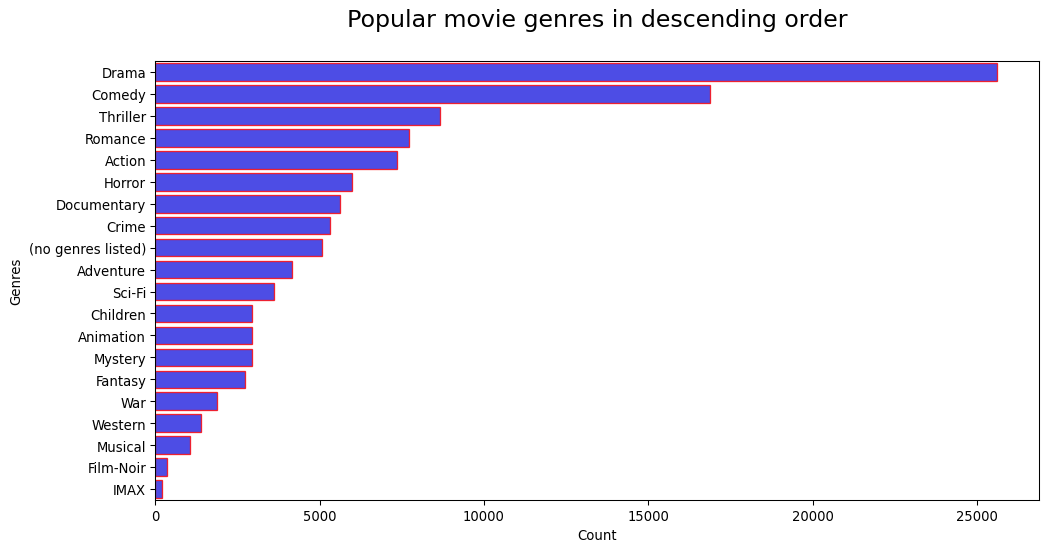

In [38]:
# Ploting the genres in descending order
plot = plt.figure(figsize=(12, 6), dpi =95)
plt.title('Popular movie genres in descending order\n', fontsize=18)
sns.countplot(y="genres", data=movies_genres_split,order=movies_genres_split['genres']
              .value_counts(ascending=False).index, color='blue', ec= 'red', alpha=0.8)
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

In [39]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,62423.0,122220.387646,63264.744844,1.0,82146.5,138022.0,173222.0,209171.0


In [40]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 62423 entries, 0 to 62422

Data columns (total 3 columns):

 #   Column   Non-Null Count  Dtype 

---  ------   --------------  ----- 

 0   movieId  62423 non-null  int64 

 1   title    62423 non-null  object

 2   genres   62423 non-null  object

dtypes: int64(1), object(2)

memory usage: 1.4+ MB


**N/B:** For analysis purpose, the code below joins the 'movies', 'imbd', and 'train' dataframes together where movieId in one dataframe is the same as the movieId in the other dataframe.

In [41]:
imdb_movies = pd.merge(movies_df,imdb_df, on="movieId")
df = imdb_movies.merge(train_df, on="movieId")
df.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,97203,5.0,942683155


In [42]:
df.shape

(9633031, 11)

We can see that after merging the 3 datasets, the dataframe now has ~9.63M rows of data.

Now, let's check the average rating of each movie

In [43]:
# Getting the average rating for all the ratings related to a specific movie title.
df.groupby(by='title')['rating'].mean()

title
"Great Performances" Cats (1998)             2.753731
$ (Dollars) (1971)                           2.875000
$5 a Day (2008)                              3.125000
$9.99 (2008)                                 3.222222
$ellebrity (Sellebrity) (2012)               2.250000
                                               ...   
À nous la liberté (Freedom for Us) (1931)    3.746914
À propos de Nice (1930)                      3.200000
Árido Movie (2005)                           3.000000
Üvegtigris (2001)                            3.142857
貞子3D (2012)                                  2.562500
Name: rating, Length: 23534, dtype: float64

In [44]:
# Sorting the movies from highest average rating to the lowest rating
df.groupby(by='title')['rating'].mean().sort_values(ascending=False)

title
Wrestling for Jesus: The Tale of T-Money (2011)       5.0
The... Beautiful Country (1977)                       5.0
Only Daughter (2013)                                  5.0
Vasermil (2007)                                       5.0
Day the Universe Changed, The (1985)                  5.0
                                                     ... 
Time to Kill (Tempo di uccidere) (1989)               0.5
Dangerous Place, A (2012)                             0.5
Dana Carvey: Squatting Monkeys Tell No Lies (2008)    0.5
I Love, You Love (Ja milujem, ty milujes) (1989)      0.5
Beautiful Girl (2014)                                 0.5
Name: rating, Length: 23534, dtype: float64

From the results above, it seems as though there are some movies that are highly rated. Would it be a good idea to just watch those movies based on their average rating? Let's find out!

Below, the number of people that rated each movie is explored.

In [45]:
df.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
                                    ...  
Christopher Strong (1933)               1
Secrets of the Tribe (2010)             1
Trails (Veredas) (1978)                 1
Train Ride to Hollywood (1975)          1
Seoul Searching (2015)                  1
Name: rating, Length: 23534, dtype: int64

Let's take for example, the movie called `Vietnam in HD(2011)`, which has an average rating of 5.0, and observe how many people actually rated this movie.

In [46]:
df[df['title'] == "Vietnam in HD (2011)"].groupby(by='title')['rating'].count()

title
Vietnam in HD (2011)    1
Name: rating, dtype: int64

It is observed that the movie was rated by only 1 person. Wow! no too much confidence for recommending the movie to someone else, right?

Let's now take a look at another movie, such as `Forest Gump (1994)`

In [47]:
df[df['title'] == "Forrest Gump (1994)"].groupby(by='title')['rating'].count()

title
Forrest Gump (1994)    32383
Name: rating, dtype: int64

Using, the mean rating for this same movie, we we have:

In [48]:
df[df['title'] == "Forrest Gump (1994)"].groupby(by='title')['rating'].mean()

title
Forrest Gump (1994)    4.047216
Name: rating, dtype: float64

The above movie has an average rating of 4, and was rated by 32383 people. This would definitely be a better movie to recommend than the first movie. Though, it's also worth noting that just because the movie was highly rated by many people, it does not mean that the next person would definitely love it too, which is why we still need a recommender system.

In [49]:
print('Runtime column mode is: ',df.runtime.mode())

print('\nRuntime mean is: ',df.runtime.mean())

Runtime column mode is:  0    101.0

Name: runtime, dtype: float64



Runtime mean is:  116.09646355365558


From above, it is observed that the modal run time is 101 minutes(1 hour 41 minutes), and the average run time is 116 minutes(1 hour 51 minutes).

<Axes: xlabel='rating', ylabel='count'>

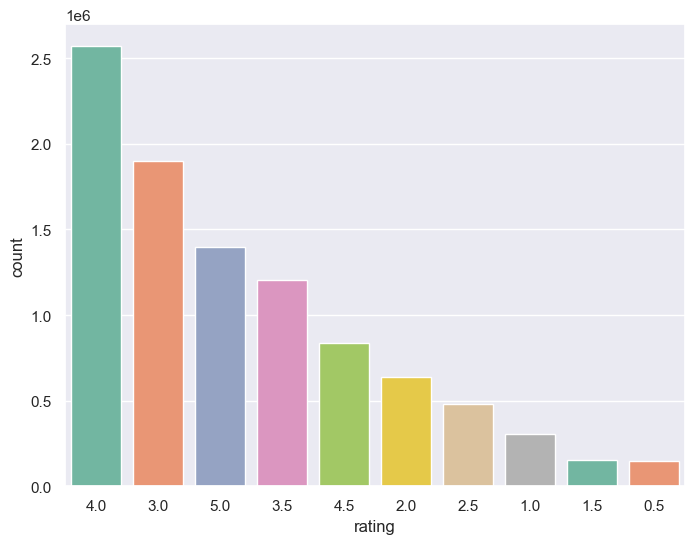

In [50]:
#Movies Ratings
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= df, palette="Set2", order=df['rating'].value_counts().index[0:10])

In [51]:
len(movies_df.movieId.unique())

62423

In [52]:
len(train_df.movieId.unique())

48213

From the results above, it can be seen that out of 62,423 unique movies, 48, 213 movies have been rated.

C:\Users\ctair\AppData\Local\Temp\ipykernel_27152\1339047704.py:2: FutureWarning: 



`shade` is now deprecated in favor of `fill`; setting `fill=True`.

This will become an error in seaborn v0.14.0; please update your code.



  sns.kdeplot(data=df['runtime'], shade=True)


<Axes: xlabel='runtime', ylabel='Density'>

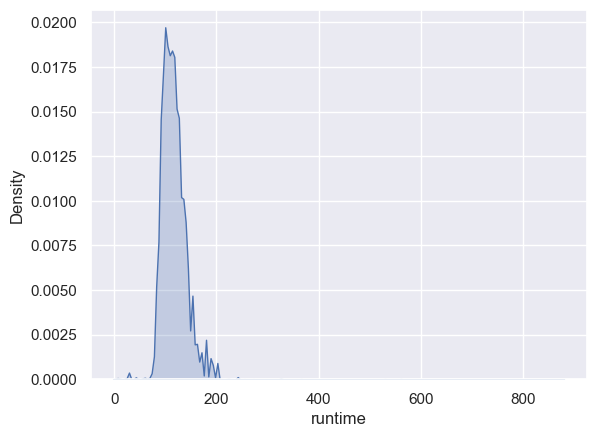

In [53]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['runtime'], shade=True)

- It is can be seen that a good amount of movies have a run time of around 75-120 minutes.
- Very few movies have a runtime of less than 50 minutes, or more than 200 minutes

In [54]:
df['runtime'].describe().T

count    6.979973e+06
mean     1.160965e+02
std      2.409290e+01
min      1.000000e+00
25%      1.000000e+02
50%      1.130000e+02
75%      1.280000e+02
max      8.770000e+02
Name: runtime, dtype: float64

Moreover, It can be seen that there are outliers in the runtime column of the data set.
- There are values which are above 877, and
- Values as low as 1.0

<a id="four"></a>
### 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### 5.1 The Content-Based Recommender System 
This recommender system suggests similar items based on a particular item. This system uses item meta-data, such as genre, director, description, actors, etc. for movies, to make recommendations.

#### Why do we do content-based filtering?

If we want to get a new item in an e-commerce site, for example, and we don't have any clicks/views/rating on that item, or we could have new users on the platform, and we have no idea about what they like or do not like. In this case, we carryout content-based filtering in order to get a similarity between different items so that another similar item can be recommended.

In this recommender system, the content of the movie (`genres`, `plot_keywords`,  `title_cast`, and `title`) is used to find its similarity with other movies, then the movies that are most likely to be similar are recommended.

In [55]:
imdb_movies = pd.merge(movies_df,imdb_df, on="movieId")

In [56]:
imdb_movies.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [57]:
imdb_movies.isnull().sum()

movieId              0
title                0
genres               0
title_cast        9665
director          9519
runtime          11345
budget           17583
plot_keywords    10482
dtype: int64

From actions below, the runtime columns null values are now replaced by the mean.

In [58]:
imdb_movies['runtime'].fillna(imdb_movies['runtime'].mean(), inplace=True)

In [59]:
imdb_movies.isnull().sum()

movieId              0
title                0
genres               0
title_cast        9665
director          9519
runtime              0
budget           17583
plot_keywords    10482
dtype: int64

In [60]:
# Convert 'title_cast' column to string
imdb_movies['title_cast'] = imdb_movies['title_cast'].astype(str)
# Convert 'plot_keywords' column to string
imdb_movies['plot_keywords'] = imdb_movies['plot_keywords'].astype(str)

All null values of the columns in the imdb_movies dataframe are replaced by zero's. This is done for the columns: title_cast, director, budget, and plot_keywords. The reason these columns are not imputed, and are just filled with zero's is that each movie surely has a different set of cast, plot keywords, etc. So, imputing them with another value other than zero would not be a good representation of the movies themselves.

In [61]:
imdb_movies.replace(np.nan,0)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...,...,...
24861,131254,Kein Bund für's Leben (2007),Comedy,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,0,man wrapped in a towel|man wears a thong|male ...
24862,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
24863,131258,The Pirates (2014),Adventure,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,0,pirate|sword fight|korea|bandit
24864,131260,Rentun Ruusu (2001),(no genres listed),Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,0,friend|friendship|television show|restaurant


In [62]:
imdb_movies.isnull().sum()

movieId              0
title                0
genres               0
title_cast           0
director          9519
runtime              0
budget           17583
plot_keywords        0
dtype: int64

In [63]:
#imdb_movies[imdb_movies['title_cast','director', 'budget', 'plot_keywords'] = imdb_movies[imdb_movies['title_cast','director', 'budget', 'plot_keywords']].fillna(0)
#imdb_movies.fillna(0, subset=['title_cast','director', 'budget', 'plot_keywords'], inplace=True)

In [64]:
import re
# Using regex to clean the movie titles and storing it in the new columns
def clean_titles(title):
    return re.sub("[^a-zA-Z0-9 ]", " ", title)

imdb_movies["clean_title"] = imdb_movies["title"].apply(clean_titles)
imdb_movies.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II 1995


In [65]:
imdb_movies["clean_title"] = imdb_movies["title"].apply(lambda x: x.lower())

In [66]:
imdb_movies.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,toy story (1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,jumanji (1995)


In [67]:
imdb_movies['clean_title'] = imdb_movies['clean_title'].apply(lambda x: x.replace("(","").replace(")",""))

In [68]:
imdb_movies.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,toy story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,jumanji 1995


#### Removing  the "|" from the title_cast, genres, and plot_keywords columns

In [69]:
imdb_movies.title_cast = imdb_movies.title_cast.str.replace('|', ' ')
imdb_movies.genres = imdb_movies.genres.str.replace('|', ' ')
imdb_movies.plot_keywords = imdb_movies.plot_keywords.str.replace('|', ' ')
imdb_movies.head(2)

C:\Users\ctair\AppData\Local\Temp\ipykernel_21800\2914716174.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

  imdb_movies.title_cast = imdb_movies.title_cast.str.replace('|', ' ')

C:\Users\ctair\AppData\Local\Temp\ipykernel_21800\2914716174.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

  imdb_movies.genres = imdb_movies.genres.str.replace('|', ' ')

C:\Users\ctair\AppData\Local\Temp\ipykernel_21800\2914716174.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

  imdb_movies.plot_keywords = imdb_movies.plot_keywo

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,clean_title
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation,toy story 1995
1,2,Jumanji (1995),Adventure Children Fantasy,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game,jumanji 1995


#### Changing the genres, title_cast and plot_keywords columns to lowercase.

In [70]:
imdb_movies["genres"] = imdb_movies["genres"].apply(lambda x: x.lower())

In [71]:
imdb_movies["title_cast"] = imdb_movies["title_cast"].apply(lambda x: x.lower())

In [72]:
imdb_movies["plot_keywords"] = imdb_movies["plot_keywords"].apply(lambda x: x.lower())

In [73]:
imdb_movies.head(5)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,clean_title
0,1,Toy Story (1995),adventure animation children comedy fantasy,tom hanks tim allen don rickles jim varney wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation,toy story 1995
1,2,Jumanji (1995),adventure children fantasy,robin williams jonathan hyde kirsten dunst bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game,jumanji 1995
2,3,Grumpier Old Men (1995),comedy romance,walter matthau jack lemmon sophia loren ann-ma...,Mark Steven Johnson,101.0,"$25,000,000",boat lake neighbor rivalry,grumpier old men 1995
3,4,Waiting to Exhale (1995),comedy drama romance,whitney houston angela bassett loretta devine ...,Terry McMillan,124.0,"$16,000,000",black american husband wife relationship betra...,waiting to exhale 1995
4,5,Father of the Bride Part II (1995),comedy,steve martin diane keaton martin short kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion,father of the bride part ii 1995


#### Now, the content-based recommender system will use the genres, title_cast, plot_keywords, and the clean_title columns as the content, to calculate the similiary value.

In [74]:
# Selecting the relevant features for recommendation
selected_features = ['genres','title_cast','plot_keywords','clean_title']
print(selected_features)

['genres', 'title_cast', 'plot_keywords', 'clean_title']


In [75]:
# Replacing the null valuess with null string
for feature in selected_features:
    imdb_movies[feature] = imdb_movies[feature].fillna('')

In [76]:
# Combining all the 5 selected features
joined_features = imdb_movies['genres']+' '+imdb_movies['plot_keywords']+' '+imdb_movies['title_cast']+' '+imdb_movies['clean_title']

#### Next, text processing needs to be done to convert the word vector of our joined feature. Now, we'll compute Term Frequency-Inverse Document Frequency(TF-IDF) vectors for these joined features.

- Wondering what is term frequency?

It is the relative frequency of a word in a document, and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term and is given as log(number of documents/documents with term). The overall importance of each word to the documents in which they appear is equal to TF * IDF.

- This will gives a matrix where each column represents a word in the joined features vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in the features and therefore, their significance in computing the final similarity score.

- Fortunately, scikit-learn gives us a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. 

That's great, isn't it?


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tfidf = vectorizer.fit_transform(joined_features)

In [78]:
tfidf.shape

(24866, 536106)

We can see that 536,106 different words were used to describe the 24,866 movies in our dataset.

Now, since TF-IDF vectorizer was used, calculating the dot product will directly return the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [79]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf, tfidf)

In [80]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(imdb_movies.index, index=imdb_movies['clean_title']).drop_duplicates()

We are now in a good position to define the content-based recommendation function. These are the following steps we'll follow :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element(index 1).
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [81]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return imdb_movies['clean_title'].iloc[movie_indices]

#### Now, testing the content-based recommender system

In [82]:
get_recommendations('toy story 1995')

3020                            toy story 2 1999
14758                           toy story 3 2010
22140            toy story toons: small fry 2011
22139    toy story toons: hawaiian vacation 2011
23079      toy story toons: partysaurus rex 2012
23081            toy story that time forgot 2014
20294                   toy story of terror 2013
7786                chipmunk adventure, the 1987
4779                         monsters, inc. 2001
2050                      american tail, an 1986
Name: clean_title, dtype: object

In [83]:
get_recommendations('waiting to exhale 1995')

1327     preacher's wife, the 1996
23850           hen, his wife 1990
1562                soul food 1997
6695        rage in harlem, a 1991
2467          king and i, the 1999
23494               melbourne 2014
5                        heat 1995
1639     for richer or poorer 1997
18181             being flynn 2012
3913          what women want 2000
Name: clean_title, dtype: object

In [84]:
get_recommendations('monsters, inc. 2001')

19693               monsters university 2013
13327                                up 2009
0                             toy story 1995
7786            chipmunk adventure, the 1987
2025             lord of the rings, the 1978
5052     ferngully: the last rainforest 1992
14912                 wizard of oz, the 1925
2263                      bug's life, a 1998
1943                black cauldron, the 1985
2050                  american tail, an 1986
Name: clean_title, dtype: object

**Wow!** The content-based recommender system has done a good job at returning recommendation of similar movies. A user who enters the movie "toy story 1995" receives other toy story movie from different years, as well as other similar movies.

#### 5.2 Collaborative-based Filtering

- Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

- Also, the recommendation engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

- Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to movie watchers.

In [4]:
from surprise import Reader
reader = Reader(rating_scale=(0.5, 5))
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
test_df.shape, train_df.shape

((5000019, 2), (10000038, 4))

In [6]:
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

<a id="five"></a>
### 6. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### Model 1: Singular Value Decomposition
Singular Value Decomposition (SVD) is a collaborative filtering method for movie recommendation.

**How does it work in recommender systems?**

- Within the context of recommender systems, the Singular Value Decomposition (SVD) serves as a method for collaborative filtering. It employs a matrix format where users are represented by rows and items by columns, with the matrix elements corresponding to the ratings users assign to items.

In [24]:
svd_model2 = SVD(n_epochs=35,n_factors=400,init_std_dev=0.001,random_state=42,verbose=True)
svd_model2.fit(trainset)
svd_predictions = svd_model2.test(testset)
svd_rmse2 = accuracy.rmse(svd_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
RMSE: 0.8092


In [25]:
svd_model3 = SVD(n_epochs=50,n_factors=400,init_std_dev=0.001,random_state=42,verbose=True)
svd_model3.fit(trainset)
svd_predictions = svd_model3.test(testset)
svd_rmse3 = accuracy.rmse(svd_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.79

In [ ]:
# Creating a submission file for the SVD model
pred = [svd_model3.predict(test_df.userId[i], test_df.movieId[i]).est for i in test_df.index]
predictions = pd.DataFrame(pred)
predictions['Id'] = test_df['userId'].astype(str)+'_'+test_df['movieId'].astype(str)
submission = pd.DataFrame()
submission['Id']=predictions['Id']
submission['rating']=predictions[0]
submission.to_csv('svd_0.7990.csv', index=False)

#### Now, we create a submission csv file for the kaggle competition.

In [ ]:
Team_eg2_submission_pred = pd.read_csv('svd_0.7990.csv')
Team_eg2_submission_pred.head(5)

In [ ]:
# Shape of the prediction dataset
Team_eg2_submission_pred.shape

#### Model 2: SVD Plus Plus

SVD Plus Plus stands as an extension to the SVD model and functions as an algorithm for predicting user preferences or ratings for items. The core concept behind SVD++ involves incorporating both explicit and implicit feedback during the factorization process.

While the conventional SVD model solely considers explicit ratings offered by users, SVD++ goes a step further by taking implicit feedback into consideration. Implicit feedback includes factors like the frequency of a user viewing an item. To accommodate this, SVD++ introduces additional latent factors into the model to represent the user's implicit preferences. The factorization process is then adjusted to incorporate these latent factors, resulting in more precise and resilient predictions of user preferences.

In [ ]:
from surprise import SVDpp
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

# Assuming you have a 'train' DataFrame with 'userId', 'movieId', and 'rating' columns
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Now you can use SVDpp
svdpp_model = SVDpp(n_epochs=50, n_factors=400, init_std_dev=0.001, random_state=42, verbose=True)
svdpp_model.fit(trainset)
svdpp_predictions = svdpp_model.test(testset)

In [ ]:
svdpp_model = SVDpp(n_epochs=50,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)
svdpp_model.fit(trainset)
svdpp_predictions = svdpp_model.test(testset)
svdpp_rmse = accuracy.rmse(svdpp_predictions)

#### Model 3: Non-negative Matrix Factorization

Non-negative Matrix Factorization (NMF) is a mathematical method in linear algebra employed to break down a non-negative matrix into two corresponding non-negative matrices.

In the context of NMF, a non-negative matrix A can be decomposed into the product of two matrices, W and H, both of which are non-negative. Matrix W signifies the data's fundamental basis, while matrix H represents the coefficients associated with this basis. This decomposition serves the purpose of uncovering the inherent structure within the data, reducing its dimensionality, and facilitating data compression.

NMF proves to be a potent technique for extracting features from high-dimensional data, with the columns of matrix W representing these features and the rows of matrix H representing observations. This method is especially advantageous in scenarios where data sparsity is evident, such as in text mining and image processing, aiming to extract the most crucial features from the given data.

In [26]:
nmf_model = NMF(n_epochs=5, n_factors=400, random_state=42,verbose=True)
nmf_model.fit(trainset)
nmf_predictions =nmf_model.test(testset)
nmf_rmse = accuracy.rmse(nmf_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
RMSE: 3.1907


#### Model 4: Slope One

The fundamental concept underlying the Slope One model involves utilizing the variations in ratings among different items to predict a user's preferences.

In the Slope One model, the dissimilarity between the ratings of two items is computed and stored in a matrix, referred to as the deviation. When predicting a user's rating for a particular item, the ratings of other items the user has rated, along with the deviations between those items and the item under prediction, are leveraged to make the prediction.

The name "Slope One" is derived from the algorithm's ability to estimate the slope of the best-fit line between ratings of distinct items. This slope indicates the average deviation between ratings of different items and serves as a basis for predicting user preferences.

Slope One is known for its ease of implementation, independence from a user-item matrix, memory efficiency, speed, scalability to large datasets, and compatibility with both explicit and implicit feedback.

In [ ]:
"""
# This model uses the whole 30GB allocated to us on Kaggle

slo_model = SlopeOne()

# Set the deviation regularization
slo_model.deviation_regularization = 0.01

# Set the similarity threshold
slo_model.similarity_threshold = 0.3

# Set the minimal number of ratings
slo_model.min_ratings = 10

# Set the number of recommendations
slo_model.num_recommendations = 10

# Set the cold start problem
slo_model.cold_start = 'global_average'

slo_model.fit(trainset)
slo_predictions = slo_model.test(testset)
slo_rmse=accuracy.rmse(slo_predictions)
"""

In [8]:
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly

In [1]:
from surprise import KNNWithZScore, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# Define the reader
reader = Reader(rating_scale=(1, 5))

# Set hyperparameters
k_neighbors = 40  # Adjust the number of neighbors as needed

# Create and train the model using KNNWithZScore
knn_model = KNNWithZScore(k=k_neighbors, sim_options={'name': 'pearson_baseline', 'user_based': False}, verbose=True)
knn_model.fit(trainset)

# Make predictions and calculate RMSE
knn_predictions = knn_model.test(testset)
knn_rmse = accuracy.rmse(knn_predictions)

print(f"RMSE: {knn_rmse}")

NameError: name 'trainset' is not defined

In [ ]:
from surprise import SlopeOne, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# Define the reader
reader = Reader(rating_scale=(1, 5))

# Load the dataset
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create and train the model using SlopeOne
slope_one_model = SlopeOne()
slope_one_model.fit(trainset)

# Make predictions and calculate RMSE
slope_one_predictions = slope_one_model.test(testset)
slope_one_rmse = accuracy.rmse(slope_one_predictions)

print(f"RMSE: {slope_one_rmse}")

In [ ]:
from surprise import CoClustering, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# Define the reader
reader = Reader(rating_scale=(1, 5))

# Load the dataset
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Set hyperparameters
n_epochs = 20  # Adjust the number of epochs as needed
n_cltr_u = 3   # Number of user clusters
n_cltr_i = 3   # Number of item clusters

# Create and train the model using CoClustering
co_clustering_model = CoClustering(n_epochs=n_epochs, n_cltr_u=n_cltr_u, n_cltr_i=n_cltr_i, random_state=42, verbose=True)
co_clustering_model.fit(trainset)

# Make predictions and calculate RMSE
co_clustering_predictions = co_clustering_model.test(testset)
co_clustering_rmse = accuracy.rmse(co_clustering_predictions)

print(f"RMSE: {co_clustering_rmse}")

In [ ]:
from surprise import BaselineOnly, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# Define the reader
reader = Reader(rating_scale=(1, 5))

# Load the dataset
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Set hyperparameters
bsl_options = {'method': 'sgd', 'learning_rate': 0.005, 'n_epochs': 20, 'reg': 0.02}

# Create and train the model using BaselineOnly
baseline_model = BaselineOnly(bsl_options=bsl_options, verbose=True)
baseline_model.fit(trainset)

# Make predictions and calculate RMSE
baseline_predictions = baseline_model.test(testset)
baseline_rmse = accuracy.rmse(baseline_predictions)

print(f"RMSE: {baseline_rmse}")

In [ ]:
# Assuming you have a 'train' DataFrame with 'userId', 'movieId', and 'rating' columns
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Now you can use SVDpp
KNNBasic_model = KNNBasic(n_epochs=50, n_factors=400, init_std_dev=0.001, random_state=42, verbose=True)
KNNBasic_model.fit(trainset)
KNNBasic_predictions = KNNBasic_model.test(testset)

In [ ]:
KNNBasic_model = KNNBasic(n_epochs=50,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)
KNNBasic_model.fit(trainset)
KNNBasic_predictions = KNNBasic_model.test(testset)
KNNBasic_rmse = accuracy.rmse(KNNBasic_predictions)

<a id="six"></a>
### 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [ ]:
#Bar graph with the f1 score for each model\n",
models = ['Logistic regression', 'Random Forest', 'K Nearest Neighbor', 'Support Vector Classifier']
f1_score = [f1_lg,f1_rfc,f1_knn,f1_svs]
fig, ax = plt.subplots()
hbars = ax.barh(models, f1_score, align='center',color=['green'])
ax.set_yticks(models, labels= models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('F1_score')
ax.set_title('Model Performance comparison')
ax.bar_label(hbars, fmt='%.2f',padding=8, color='b', fontsize=14)
ax.set_xlim(right=1)  

plt.show()

<a id="six"></a>
### 8. Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="six"></a>
### 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


This notebook, the movieLens dataset was used to create our recommender system. The dataset draws on movie ratings and movie specific data dating back.

We the used 4 different models to build a recommender system. Due to its inefficiency we did not include the content base method as a solution.We also noticed that a high percentage of our movies were rated above 3 with the top 3 occurring ratings being 4, 3 and 5 in that order and that alone comprised 50% of total ratings. There are 19 unique movie genres in the dataset with Drama, comedy and thriller being the 3 most popular genres.

We ended upi with the model singular value decomposition(SVD), it is a collaborative filtering method that deals with the sparsity that we had with the user-user and item-item memory based methods, the advantage of being computationally more efficient than content based method 

In order to produce new recommendations we attempted collaborative based filtering methods because they draw only on past interactions between users and items. These methods do not require item meta-data like their content-based counterparts. This has an added advantage of adapting users' interest which might change over time.

The SVD model had improved where we changed the default parameters and was able to predict new ratings with a RMSE score of 0.79870 on kaggle.

Possible improvements:

Collaborative filtering methods have an issue with the cold start problem, which the content based filtering method doesn’t. This problem can be addressed by implementing a hybrid recommender system that uses a combination of both content and collaborative filtering based methods.
In conclusion, Netflix had brought to light how unsurpervised learning can be used to better predict what a potential user could possibly say about a movie, that then guides the choice to recommend the movie to them or not. Collaborative filtering is more subjective over content and it's a better algorithm to choose over content based as it ensures more variery on predictions for recommendations. On model the SVD algorithm from the surprise package proved to be a better model for prediction as compared to the rest.

<a id="eight"></a>
### 10. Resources
<a href=#cont>Back to Table of Contents</a>

- https://www.enjoyalgorithms.com/blog/recommender-system-using-machine-learning
- https://www.datacamp.com/tutorial/recommender-systems-python
- https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
- https://realpython.com/build-recommendation-engine-collaborative-filtering/ (Models)